In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
df = pd.read_csv('finalout.csv')

In [70]:
df['imdb_score'].min()

1.6

In [71]:
#Categorising the target varible 
bins = [ 1, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df['imdb_label'] = pd.cut(df['imdb_score'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Categorization Imdb Score')

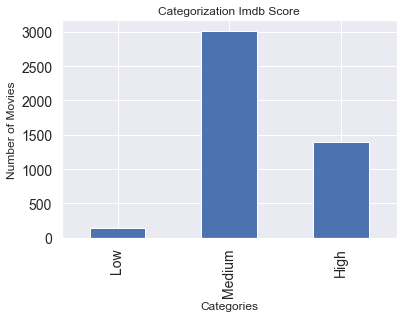

In [72]:
df.groupby(['imdb_label']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization Imdb Score')

In [73]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['imdb_label']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x.astype('str')))

In [74]:
df['imdb_label']

0       0
1       0
2       2
3       0
4       2
       ..
4549    2
4550    2
4551    0
4552    2
4553    2
Name: imdb_label, Length: 4554, dtype: int32

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X = df.drop(['imdb_score','imdb_label'], axis = 1)
y = df['imdb_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [76]:
X_train

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
719,1,2025,171.0,146,12000,451,2078,18000,7.786255e+07,191,...,1944,690,9,53,9,70000000.0,77,992,130,14000
990,1,409,105.0,109,0,809,2611,49000,8.355815e+06,550,...,2641,341,9,52,9,55000000.0,75,811,61,0
3783,1,124,3.0,90,0,37,1237,1000,9.150073e+07,706,...,3973,18,9,52,9,3440000.0,87,53,130,606
2142,1,429,190.0,109,453,2000,451,18000,2.641565e+07,191,...,2398,189,9,53,9,20000000.0,81,11000,130,0
4419,1,1190,26.0,112,2,321,891,786,7.707563e+06,511,...,4128,32,9,53,9,182802463.5,76,633,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1,452,89.0,200,767,382,1473,597,1.117220e+08,801,...,1951,255,9,53,7,11000000.0,38,396,130,7000
2763,1,1406,71.0,115,187,887,2276,14000,4.039320e+05,803,...,4035,92,9,52,9,20000000.0,73,900,130,141
905,1,1606,330.0,112,97,584,531,17000,1.916162e+08,142,...,2880,322,9,53,9,50000000.0,87,920,130,24000
3980,1,293,77.0,102,32,75,148,483,1.154654e+07,141,...,1609,146,4,19,9,2000000.0,67,147,130,0


# Logistic Regression

In [77]:
model_logistic=LogisticRegression()  
model_logistic.fit(X_train,y_train)             #Fit logistic regression to train data
lpred = model_logistic.predict(X_test)       #Logistic regression prediction
lpred
lscore = model_logistic.score(X_test, y_test) 
print("Accuracy:",lscore)

Accuracy: 0.7069154774972558


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(n_estimators = 200)
model_random.fit(X_train, np.ravel(y_train,order='C'))
rpred = model_random.predict(X_test)
rscore = model_random.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, rpred))

Accuracy: 0.7914379802414928


# Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
model_gb = model_gb.fit(X_train,np.ravel(y_train,order='C'))
gpred = model_gb.predict(X_test)
gscore = model_gb.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, gpred))

Accuracy: 0.7903402854006586


# Ada Boosting

In [80]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
model_ab = AdaBoostClassifier(n_estimators=60)
model_ab=model_ab.fit(X_train,np.ravel(y_train,order='C'))
apred=model_ab.predict(X_test)
ascore = model_ab.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, apred))

Accuracy: 0.7244785949506037


# Decision Tree (GINI)

In [81]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
model_dt.fit(X_train, np.ravel(y_train,order='C'))
dtpred = model_dt.predict(X_test)
dtscore = model_dt.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, dtpred))

Accuracy: 0.6937431394072447


# Decision Tree (ENTROPY)

In [82]:
from sklearn.tree import DecisionTreeClassifier
model_dte = DecisionTreeClassifier(criterion='entropy') #criterion = entopy, gini
model_dte.fit(X_train, np.ravel(y_train,order='C'))
dtepred = model_dte.predict(X_test)
dtescore = model_dte.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, dtepred))

Accuracy: 0.703622392974753


# Naive bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
model_nb= GaussianNB()
model_nb.fit(X_train, np.ravel(y_train,order='C'))
npred = model_nb.predict(X_test)
nscore = model_nb.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, npred))

Accuracy: 0.38529088913282106


# SVM

In [84]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
spred = svc.predict(X_test)
sscore = svc.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, spred))

Accuracy: 0.5422612513721186


# KNeighborsClassifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=22)
model_knn.fit(X_train, np.ravel(y_train,order='C'))
kpred = model_knn.predict(X_test)
kscore = model_knn.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, kpred))

Accuracy: 0.6289791437980241


# Comparision Table

In [86]:
output=pd.DataFrame(['Logistic Regression'],columns=['Algorithms'])
output.loc[0,'Accuracy']=lscore
output.loc[1,'Algorithms']='Random Forest'
output.loc[1,'Accuracy']=rscore
output.loc[2,'Algorithms']='Gradient Boosting'
output.loc[2,'Accuracy']=gscore
output.loc[3,'Algorithms']='Ada Boosting'
output.loc[3,'Accuracy']=ascore
output.loc[4,'Algorithms']='Desicion Tree (gini)'
output.loc[4,'Accuracy']=dtscore
output.loc[5,'Algorithms']='Desicion Tree (entropy)'
output.loc[5,'Accuracy']=dtescore
output.loc[6,'Algorithms']='Naive Bayes'
output.loc[6,'Accuracy']=nscore
output.loc[7,'Algorithms']='SVM'
output.loc[7,'Accuracy']=sscore
output.loc[8,'Algorithms']='KNeighborsClassifier'
output.loc[8,'Accuracy']=kscore

In [87]:
output

,Algorithms,Accuracy
0,Logistic Regression,0.706915
1,Random Forest,0.791438
2,Gradient Boosting,0.790340
3,Ada Boosting,0.724479
4,Desicion Tree (gini),0.693743
5,Desicion Tree (entropy),0.703622
6,Naive Bayes,0.385291
7,SVM,0.542261
8,KNeighborsClassifier,0.628979


# Comparision Graph

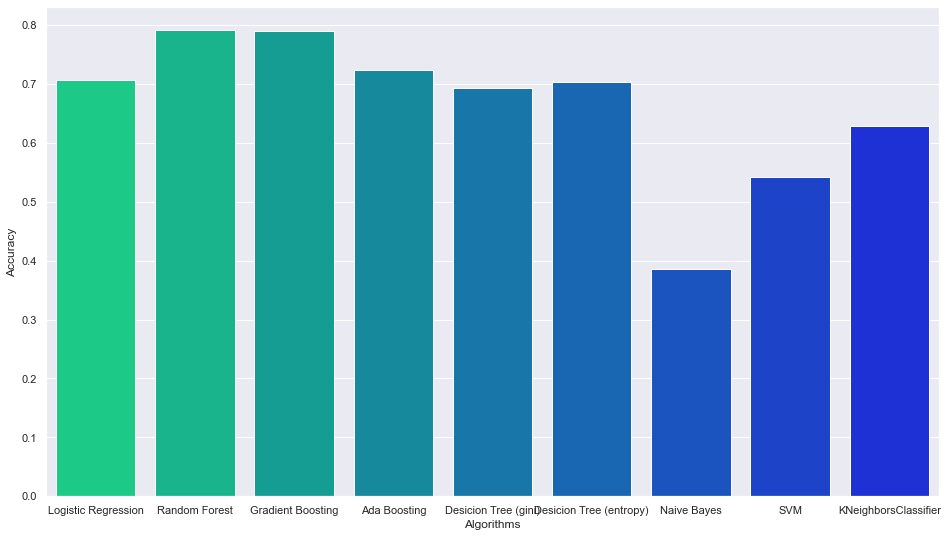

In [88]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(x='Algorithms',y='Accuracy',data=output,palette="winter_r")

# Confusion Matrix Of Algorithms

In [89]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,f1_score,recall_score
print('Logistic Regression')
lmatrix = confusion_matrix(y_test, lpred)
print(lmatrix)
print('Random Forest')
rmatrix = confusion_matrix(y_test, rpred)
print(rmatrix)
print('Gradient Boosting')
gmatrix = confusion_matrix(y_test, gpred)
print(gmatrix)
print('Ada Boosting')
amatrix = confusion_matrix(y_test, apred)
print(amatrix)
print('Decision Tree (gini)')
dtmatrix = confusion_matrix(y_test,dtpred)
print(dtmatrix)
print('Decision Tree (entropy)')
dtematrix = confusion_matrix(y_test, dtepred)
print(dtematrix)
print('Naive Bayes')
nmatrix = confusion_matrix(y_test, npred)
print(nmatrix)
print('SVM')
smatrix = confusion_matrix(y_test, spred)
print(smatrix)
print('KNeighbour Classifier')
kmatrix = confusion_matrix(y_test, kpred)
print(kmatrix)

Logistic Regression
[[126   0 175]
 [  1   0  25]
 [ 66   0 518]]
Random Forest
[[176   0 125]
 [  0   0  26]
 [ 39   0 545]]
Gradient Boosting
[[186   0 115]
 [  2   1  23]
 [ 48   3 533]]
Ada Boosting
[[183   0 118]
 [  1   1  24]
 [101   7 476]]
Decision Tree (gini)
[[188  10 103]
 [  4   4  18]
 [114  30 440]]
Decision Tree (entropy)
[[174   7 120]
 [  3   3  20]
 [ 97  23 464]]
Naive Bayes
[[ 90  82 129]
 [  0  21   5]
 [ 63 281 240]]
SVM
[[ 94  20 187]
 [  8   0  18]
 [171  13 400]]
KNeighbour Classifier
[[ 59   0 242]
 [  3   0  23]
 [ 70   0 514]]


# Classification reports Of Algorithms

In [90]:
from sklearn.metrics import classification_report

print('Logistic  Report\n',classification_report(y_test, lpred))
print('Random Forests Report\n',classification_report(y_test, rpred))
print('Gradient Boosting Report',classification_report(y_test, gpred))
print('Ada Boosting Report\n',classification_report(y_test, apred))
print('Decision Tree (Gini) Report\n',classification_report(y_test, dtpred))
print('Decision Tree (Entropy) Report\n',classification_report(y_test, dtepred))
print('Naive Bayes Report\n',classification_report(y_test, npred))
print('SVM Report\n',classification_report(y_test, spred))
print('KNN Report\n',classification_report(y_test, kpred))

Logistic  Report
               precision    recall  f1-score   support

           0       0.65      0.42      0.51       301
           1       0.00      0.00      0.00        26
           2       0.72      0.89      0.80       584

    accuracy                           0.71       911
   macro avg       0.46      0.44      0.44       911
weighted avg       0.68      0.71      0.68       911

Random Forests Report
               precision    recall  f1-score   support

           0       0.82      0.58      0.68       301
           1       0.00      0.00      0.00        26
           2       0.78      0.93      0.85       584

    accuracy                           0.79       911
   macro avg       0.53      0.51      0.51       911
weighted avg       0.77      0.79      0.77       911

Gradient Boosting Report               precision    recall  f1-score   support

           0       0.79      0.62      0.69       301
           1       0.25      0.04      0.07        26
         

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
